## Cache Plots

In [6]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import seaborn as sns

PHYSICAL_CORES=64

def plot(p_data, p_yId, p_xId, p_hueId, p_styleId, p_logScale=False, p_smt_marker=False, p_export_filename=None, p_xLabel=None, p_yLabel=None):
    rcParams['figure.figsize'] = 12,8
    rcParams['font.size'] = 12
    rcParams['svg.fonttype'] = 'none'
    plot = sns.lineplot(x=p_xId,
                        y=p_yId,
                        hue=p_hueId,
                        style=p_styleId,
                        data=p_data)
    if p_logScale == True:
        plot.set_yscale('log')
        plot.set_xscale('log')
    
    
    if p_xLabel != None:
        plot.set(xlabel=p_xLabel)
    else:
        plot.set(xlabel=p_xId)

    if p_yLabel != None:
        plot.set(ylabel=p_yLabel)
    else:
        plot.set(ylabel=p_yId)


    plt.grid(color='gainsboro')
    plt.grid(True,which='minor', linestyle='--', linewidth=0.5, color='gainsboro') 

    if(p_smt_marker == True):
        plt.axvline(PHYSICAL_CORES, linestyle='--', color='red', label='using SMT')

    plt.legend()

    if(p_export_filename != None):
        plt.savefig(p_export_filename)

    plt.show()

### Gauss3

#### First touch

/var/folders/zt/h71khkbd7ll9krscx1zncwlc0000gn/T/ipykernel_24688/515560087.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ref_runtime = data_frame_copy[data_frame.bench_id == '\Verb{naive}'][data_frame.threads == 1]['runtime'].values[0]


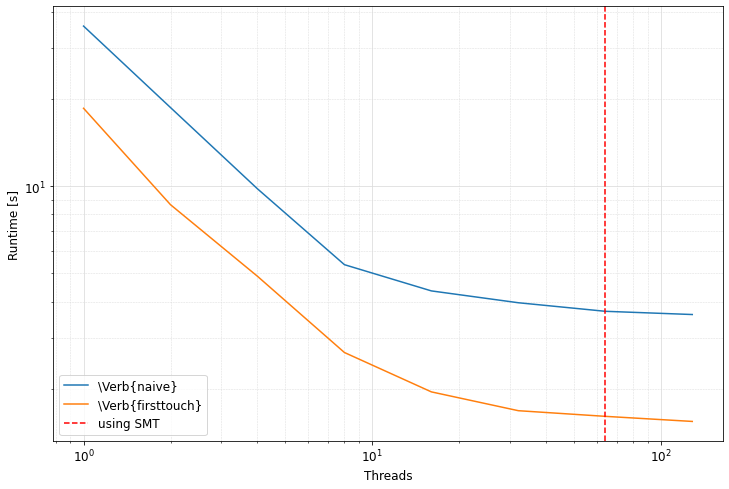

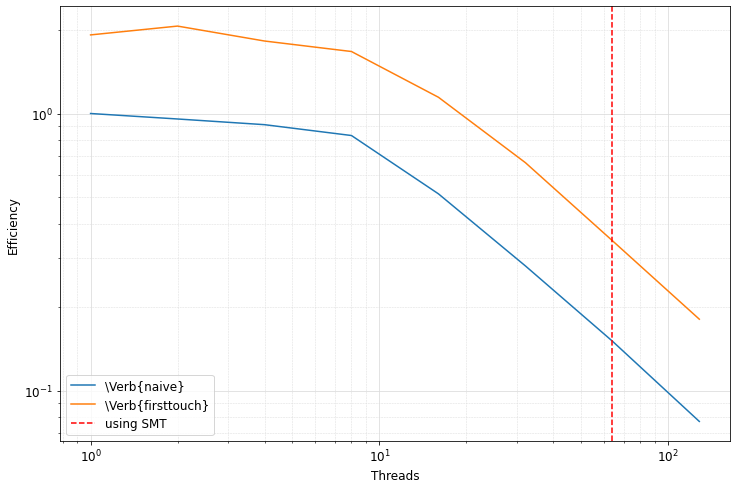

In [7]:
import pandas as pd
import seaborn as sns

# sns.set_theme()
# sns.set_style("ticks")

data_frame = pd.read_csv('./e_efficiency.csv')
data_frame = data_frame[data_frame.region_id == 'apply']
data_frame['efficiency_type'] = 'relative'

#
# NOTE: calc absolute efficiency
#
data_frame_copy = data_frame.copy()
data_frame_copy['efficiency_type'] = 'absolute'
ref_runtime = data_frame_copy[data_frame.bench_id == '\Verb{naive}'][data_frame.threads == 1]['runtime'].values[0]
data_frame_copy['efficiency']=data_frame_copy.apply(lambda row: ref_runtime/(row['runtime'] * row['threads']), axis=1)

data_frame = data_frame_copy.append(data_frame)

data_frame = data_frame[data_frame.efficiency_type == 'absolute']

# display(data_frame)

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='threads',
    p_hueId='bench_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True,
    p_export_filename='runtime.svg',
    p_xLabel="Threads",
    p_yLabel="Runtime [s]")
plot(p_data=data_frame,
    p_yId='efficiency',
    p_xId='threads',
    p_hueId='bench_id',
    p_styleId=None,
    p_logScale=True,
    p_smt_marker=True,
    p_export_filename='efficiency.svg',
    p_xLabel="Threads",
    p_yLabel="Efficiency")

#### First touch RND

In [8]:
import pandas as pd

data_frame = pd.read_csv('./e_linear_stencil_strong_scale_rnd_gauss3.csv')
# data_frame = data_frame[data_frame.region_id == 'apply']

plot(p_data=data_frame,
    p_yId='runtime',
    p_xId='threads',
    p_hueId='bench_id',
    p_styleId='region_id',
    p_logScale=True,
    p_core_marker=True)
plot(p_data=data_frame,
    p_yId='efficiency',
    p_xId='threads',
    p_hueId='bench_id',
    p_styleId='region_id',
    p_logScale=True,
    p_core_marker=True)

FileNotFoundError: [Errno 2] No such file or directory: './e_linear_stencil_strong_scale_rnd_gauss3.csv'

#### NUMA

##### bandwidth

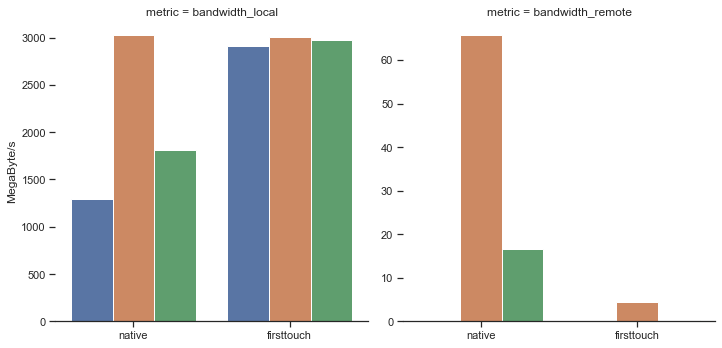

In [ ]:
import pandas as pd
import seaborn as sns

data_frame = pd.read_csv('./e_numa.csv')
data_frame = data_frame[data_frame.property != 'sum']
data_frame = data_frame[data_frame.metric_type == 'speed']

rcParams['figure.figsize'] = 12,8
rcParams['font.size'] = 12
rcParams['svg.fonttype'] = 'none'

g = sns.catplot(
    data=data_frame,
    kind='bar',
    x='impl_id',
    y='value',
    hue='property',
    col='metric',
    sharey=False,
    legend=False
)

g.despine(left=True)
g.set_axis_labels("", "MegaByte/s")

g.savefig('numa_bandwidth.svg')

##### data_volume

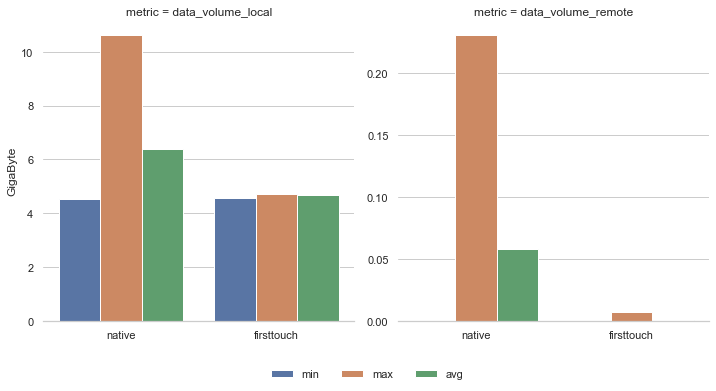

In [ ]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

data_frame = pd.read_csv('./e_numa.csv')
data_frame = data_frame[data_frame.property != 'sum']
data_frame = data_frame[data_frame.metric_type == 'amount']

rcParams['figure.figsize'] = 12,8
rcParams['font.size'] = 12
rcParams['svg.fonttype'] = 'none'

g = sns.catplot(
    data=data_frame,
    kind="bar",
    x="impl_id",
    y="value",
    hue="property",
    col="metric",
    sharey=False,
    legend=False
)

g.despine(left=True)
g.set_axis_labels("", "GigaByte")

# g.fig.get_axes()[0].legend(loc='lower center')
# sns.move_legend(g, "lower center", bbox_to_anchor=(.5, 1), ncol=3, title=None, frameon=False)
g.add_legend(
    bbox_to_anchor=(0.4,-0.1),
    loc='lower center',
    ncol=3,
    )

g.savefig('numa_data_volume.svg')